In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pyvista as pv 
import pandas as pd

In [45]:
mesh = pv.read("/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_surfmesh_(obj)/373.obj")

In [46]:
qual = mesh.compute_cell_quality(quality_measure='scaled_jacobian')
qual

PolyData (0x3516247c0)
  N Cells:    52020
  N Points:   26002
  N Strips:   0
  X Bounds:   -4.347e+01, 6.411e+01
  Y Bounds:   -1.602e+02, 1.365e+01
  Z Bounds:   -3.170e-10, 6.297e+01
  N Arrays:   6

/Users/User/Documents/Project_JEB/.venv/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


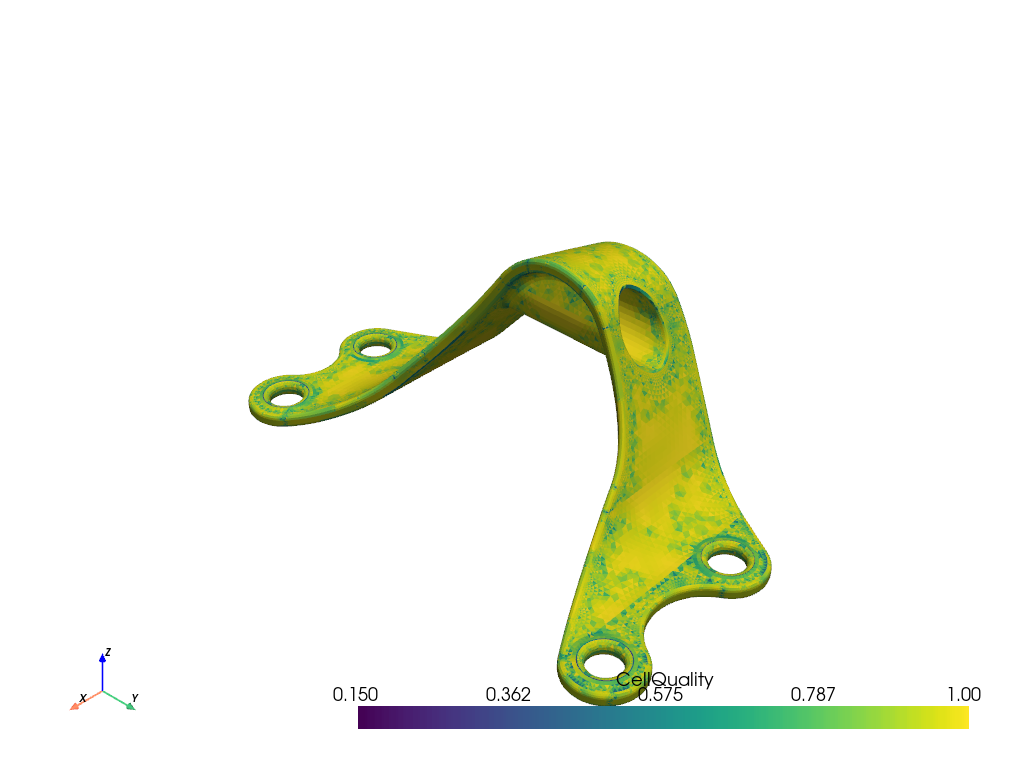

In [50]:
qual.plot(scalars='CellQuality')

/Users/User/Documents/Project_JEB/.venv/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


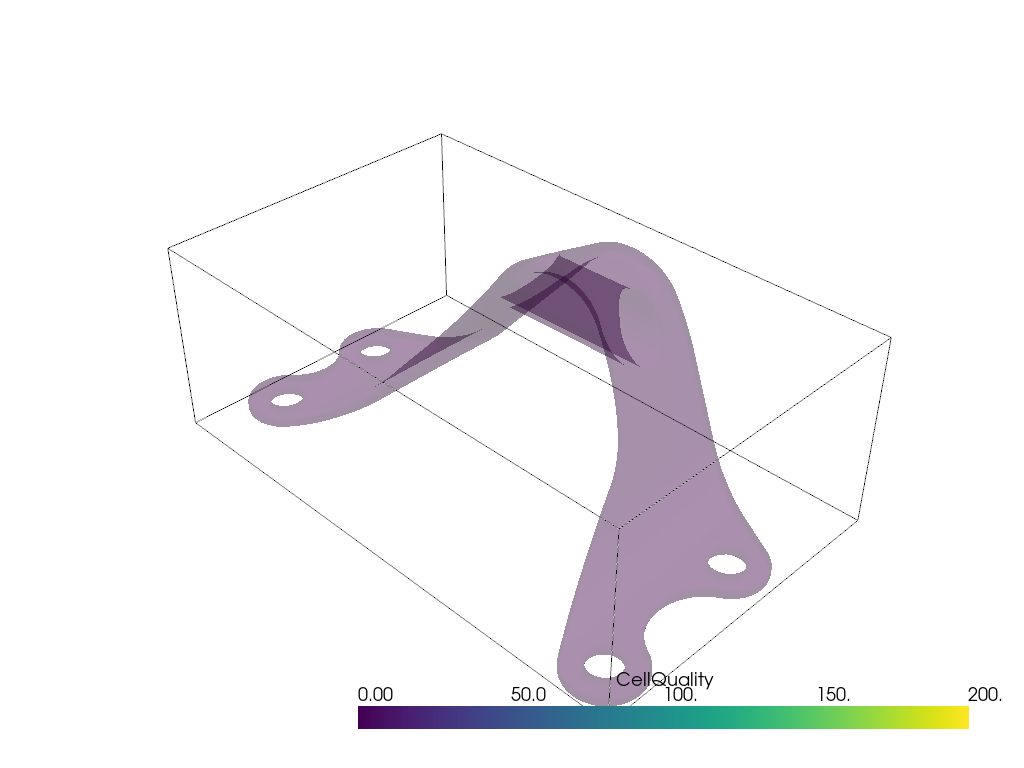

In [52]:
p = pv.Plotter()
p.add_mesh(mesh.outline(), color="k")
p.add_mesh(qual, opacity=0.25, clim=[0, 200])

p.show()

In [22]:
curvature = mesh.curvature(curv_type="mean")
#curvature.plot(scalars=curvature, cmap="coolwarm")
curvature.shape


(42360,)

In [25]:
cad_data = pd.read_csv('/Users/User/Documents/Project_JEB/Results/Data_Analysis/working_table.csv')
cad_data.head(20)

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_magdisp,max_hor_magdisp,max_dia_magdisp,max_tor_magdisp,category,num_tets,mass,density,principal_str1,principal_str2,VM_stress
0,0,42360,84764,307642.703591,73622.298369,1.347077,12.0,0.321826,0.239873,0.165667,0.174951,block,570111,1.375163,0.000004,659.877164,413.029336,578.325069
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,1.222151,1.000106,0.611791,0.399737,beam,431759,0.464950,0.000004,1062.370300,903.485300,993.165361
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,4.433872,0.965408,3.761250,0.495712,block,314815,0.514034,0.000004,4824.582762,1664.634238,4244.898019
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.516299,1.608428,0.375712,0.583333,beam,293971,0.399288,0.000004,1016.793306,949.083394,985.716598
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,2.183306,1.880950,0.787904,0.604398,beam,481030,0.350834,0.000004,1926.024972,1671.480028,1812.893841
5,10,43107,86250,89919.885283,69797.809721,1.292692,10.0,0.981850,0.828652,0.466578,0.396167,block,401725,0.401942,0.000004,791.231281,604.862219,717.993341
6,12,45862,91792,164079.852787,46607.652241,0.999295,18.0,0.747508,0.764234,0.201657,0.271566,butterfly,625048,0.733437,0.000004,1852.238956,1131.954044,1617.647637
7,14,39157,78710,211506.440657,61185.846161,1.286912,100.0,1.168271,0.933708,0.376460,0.202286,butterfly,469738,0.945434,0.000004,1331.149001,764.307799,1157.485946
8,15,20730,41484,129481.087600,48599.391540,1.604276,7.0,0.660283,0.677615,0.299637,0.232274,beam,224221,0.578780,0.000004,839.947547,641.808853,761.156241
9,16,25703,51446,98714.938654,32239.874929,1.156889,11.0,1.327584,1.026911,0.573472,0.373200,flat,303819,0.441256,0.000004,1762.591913,1248.884087,1570.652478


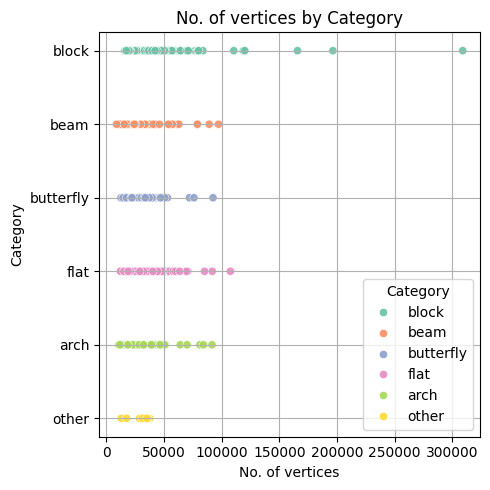

In [99]:
plt.figure(figsize=(5, 5))
sns.scatterplot(
    data=cad_data,
    x="num_vertices",
    y="category",
    hue="category",
    palette="Set2",
    alpha=0.9
)
plt.title(f"No. of vertices by Category")
plt.xlabel("No. of vertices")
plt.ylabel("Category")
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()

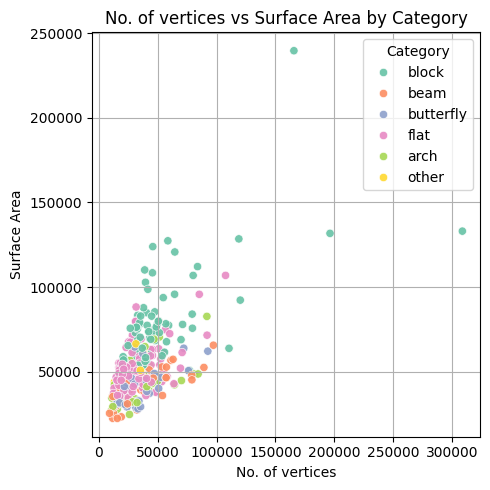

In [97]:
plt.figure(figsize=(5, 5))
sns.scatterplot(
    data=cad_data,
    x="num_vertices",
    y="surface_area",
    hue="category",
    palette="Set2",
    alpha=0.9
)
plt.title(f"No. of vertices vs Surface Area by Category")
plt.xlabel("No. of vertices")
plt.ylabel("Surface Area")
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
category_ids = cad_data.groupby('category')['id'].apply(list)
print(category_ids)

category
arch         [20, 21, 30, 38, 62, 66, 120, 122, 125, 146, 1...
beam         [4, 8, 9, 15, 23, 25, 34, 55, 70, 82, 91, 95, ...
block        [0, 6, 10, 22, 63, 65, 76, 77, 79, 86, 107, 11...
butterfly    [12, 14, 29, 35, 40, 50, 59, 73, 80, 81, 94, 1...
flat         [16, 19, 27, 28, 33, 39, 51, 53, 56, 58, 61, 6...
other              [69, 71, 221, 362, 412, 413, 420, 518, 587]
Name: id, dtype: object


In [33]:
stiffest_id = cad_data.loc[cad_data['max_dia_magdisp'].idxmin(), 'id']
print(stiffest_id)

492


In [2]:
import glob


file_paths = glob.glob("/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_surfmesh_(obj)/*.obj")


meshes = {f"design_{i}": pv.read(file) for i, file in enumerate(file_paths)}

In [10]:
sim_data = pd.read_csv('/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_simresults_.csv._firsthalf/SimJEB_simresults_(csv)_firsthalf/0field.csv')

In [23]:
sim_data.shape

(112873, 25)

In [16]:
sim_data.head(5)

,id,surf,x,y,z,ver_xdisp,ver_ydisp,ver_zdisp,ver_magdisp,ver_stress,...,dia_xdisp,dia_ydisp,dia_zdisp,dia_magdisp,dia_stress,tor_xdisp,tor_ydisp,tor_zdisp,tor_magdisp,tor_stress
0,1,1,26.34596,-76.11703,37.73680,0.057383,-0.003949,0.043452,0.072087,22.63424,...,-0.016295,-0.001289,0.044190,0.047116,19.53924,0.003498,0.001634,-0.001335,0.004086,38.14661
1,2,1,25.76159,-75.67872,37.73680,0.057451,-0.003614,0.044986,0.073057,37.77249,...,-0.016213,-0.001009,0.044713,0.047572,29.81713,0.003128,0.001658,-0.001228,0.003747,46.30497
2,3,1,25.33441,-75.18011,37.73680,0.057497,-0.003215,0.046128,0.073784,66.24046,...,-0.016128,-0.000672,0.045101,0.047903,52.59052,0.002671,0.001702,-0.001107,0.003355,50.45366
3,4,1,25.68899,-75.57792,38.08658,0.058325,-0.003699,0.045152,0.073853,37.47857,...,-0.015924,-0.001060,0.044744,0.047505,29.73936,0.003115,0.001591,-0.001205,0.003700,45.95542
4,5,1,26.11007,-75.85416,38.47491,0.059213,-0.004081,0.044012,0.073892,22.65861,...,-0.015691,-0.001355,0.044321,0.047037,19.77427,0.003441,0.001480,-0.001279,0.003959,40.52113
